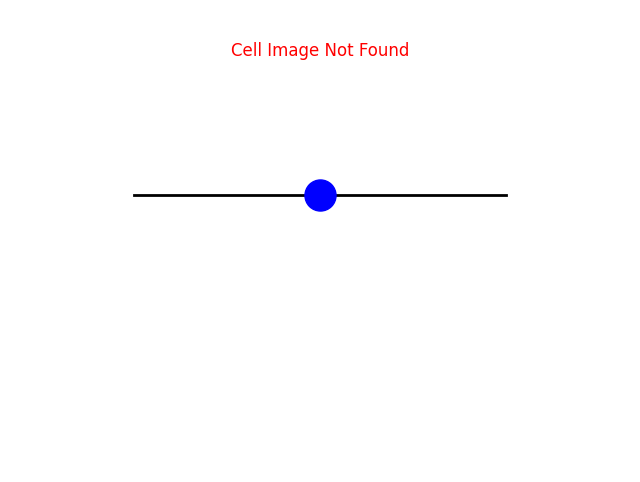

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
import matplotlib.image as mpimg
import os

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Check if the cell image exists
image_path = "cell_image.jpg"  # Ensure this file is available in your directory
image_exists = os.path.exists(image_path)

# Ray Diagram Animation: Light passing through a convex lens
def ray_diagram(frame):
    ax.clear()
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Ray diagram parameters
    focal_length = 3
    object_position = 2

    # Rays passing through the convex lens (representing an object)
    rays = np.linspace(object_position, 5, 5)
    for x in rays:
        ax.plot([x, 5], [5, 5], color='blue', lw=1)  # Rays traveling from object to lens

    # Lens representation (circle)
    lens = patches.Circle((5, 5), radius=0.5, edgecolor='black', facecolor='none', lw=2)
    ax.add_patch(lens)

    # Focal points
    ax.scatter([5 + focal_length, 5 - focal_length], [5, 5], color='red', zorder=5)
    ax.text(5 + focal_length, 5.2, "F", ha='center', fontsize=12)
    ax.text(5 - focal_length, 5.2, "F", ha='center', fontsize=12)

    # Image formation: After passing through lens
    if frame > 40:
        image_position = (object_position * focal_length) / (object_position - focal_length)
        ax.scatter(image_position, 5, color='green', s=100, zorder=5)
        ax.text(image_position, 5.2, "Image", ha='center', fontsize=12)

    ax.text(5, 4.5, "Ray Diagram", fontsize=12, ha='center')

# Transition to Microscope and Zooming Effect
def microscope_transition(frame):
    ax.clear()
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # Draw the microscope (simple lens system)
    ax.plot([2, 8], [6, 6], color='black', lw=2)  # Base of the microscope
    ax.scatter([5], [6], color='blue', s=500, zorder=3)  # Objective lens

    # Transition to cell image (zoom effect)
    if frame > 80:
        if image_exists:
            ax.imshow(np.array(mpimg.imread(image_path)), extent=[2, 8, 0, 10])  # Show cell image
            ax.text(5, 9, "Zooming Into a Cell", fontsize=12, ha='center')
        else:
            ax.text(5, 9, "Cell Image Not Found", fontsize=12, ha='center', color='red')
    else:
        ax.text(5, 9, "Microscope Zooming In", fontsize=12, ha='center')

# Update function for the animation
def update(frame):
    if frame < 40:
        ray_diagram(frame)
    else:
        microscope_transition(frame)

# Create the animation with 120 frames
ani = FuncAnimation(fig, update, frames=120, interval=100, repeat=False)

# Save the animation to a file
ani.save("ray_diagram_microscope_zoom.mp4", writer="ffmpeg", fps=30)

# Show the animation
plt.show()
